<a href="https://colab.research.google.com/github/aulphin/Multimodal_XAI_approach/blob/main/V2_alt_LAVE_(SHAP)_on_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #2. Install the exact versions
!pip install numpy==1.25.2 tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing install

In [ ]:
# !pip install numpy==1.24.4  # Explicitly install NumPy first
# !pip install tensorflow==2.15.1  # Then install TensorFlow (compatible with NumPy 1.24)

In [ ]:

!pip install keras
!pip install scikit-learn
!pip install pandas

!pip install transformers
!pip install seaborn
!pip install shap

In [ ]:
!pip install tensorflow==2.15.1
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.1 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you h

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import transformers
import sklearn


In [ ]:
# import tensorflow as tf
# import keras

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

NameError: name 'tf' is not defined

In [ ]:
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Transformers version:", transformers.__version__)
print("Seaborn version:", sns.__version__)
print("SHAP version:", shap.__version__)

In [ ]:
# ── Device ────────────────────────────────────────────────────────────
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


**Load the Pre-trained Model and its decoders**

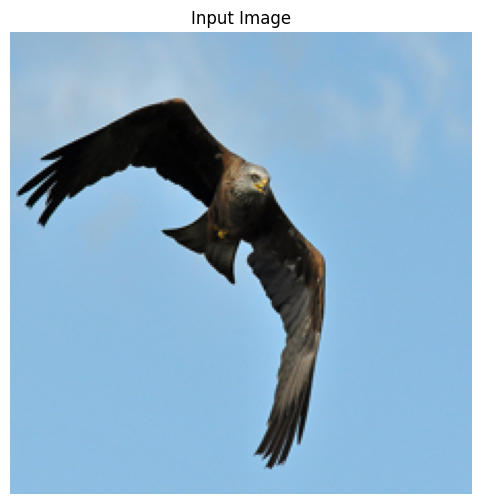

In [ ]:
# ✅ Step 3 – Load and display the custom image (PIL version)
from PIL import Image
import matplotlib.pyplot as plt
import os

# Your image path in Google Drive
#image_path = "/content/drive/MyDrive/Colab Notebooks/New-Project/VALE-Explainer/sonar_dataset/plane/plane_99.jpg"
image_path = "/content/drive/MyDrive/Colab Notebooks/New-Project/eagle.jpg"

# Load and resize image using PIL
custom_image = Image.open(image_path).convert("RGB")
resized_image = custom_image.resize((224, 224))

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(resized_image)
plt.axis('off')
plt.title("Input Image")
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
#image_path = "/content/drive/MyDrive/Colab Notebooks/New-Project/VALE-Explainer/sonar_dataset/plane/plane_99.jpg"
image_path = "/content/drive/MyDrive/Colab_Notebooks/New-Project/eagle.jpg"

# Define the directory containing the image
custom_image = cv2.imread(image_path)

# Preprocess the image
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image = cv2.resize(custom_image, (224, 224))  # Resize to fit model input size

# Plot reshaped image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('on')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from tensorflow.keras.applications import DenseNet121, imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import PIL
from PIL import Image

# Load the pre-trained DenseNet121 model with ImageNet weights
model = DenseNet121(weights="imagenet")

# Define the target image size (DenseNet121 expects 224x224)
target_size = (224, 224)

# Load the image
img = load_img(image_path, target_size=target_size)

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Preprocess the image (normalize pixel values between 0 and 1)
img_array = img_array / 255.0

# Expand the dimensions of the image to match the model's input format
img_array = np.expand_dims(img_array, axis=0)

# Predict the class probabilities
predictions = model.predict(img_array)

# Decode the predictions to obtain the top 3 class labels and probabilities
decoded_predictions = imagenet_utils.decode_predictions(predictions, top=3)[0]

print("Top 3 predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")
# Decode the predictions to obtain the class labels
decoded_predictions = imagenet_utils.decode_predictions(predictions)

35363/35363 [==============================] - 0s 1us/step
Top 3 predictions:
1: vase (0.13)
2: shower_curtain (0.07)
3: window_screen (0.04)


**Initialize the Explainer - SHAP**

In [ ]:
# SHAP Explainer
import json
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
import shap

def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

['vase', 'shower_curtain', 'window_screen', 'carton', 'shoji']


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:00, 60.00s/it]               


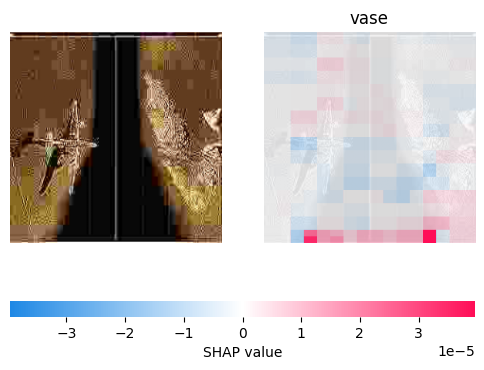

In [ ]:
import shap
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming 'decoded_predictions' contains the top 3 predictions
top_predictions = decoded_predictions[0]

# Extracting the labels from the predictions
labels = [label for _, label, _ in top_predictions]

print(labels)

# Define the directory containing the image
custom_image = cv2.imread(image_path)

# Preprocess the image
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
custom_image = cv2.resize(custom_image, (224, 224))  # Resize to fit model input size
custom_image = custom_image.astype(np.float32) / 255.0  # Normalize pixel values

# Get SHAP values
shap_values = explainer(
    custom_image.reshape(1, 224, 224, 3), max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)

# Plot SHAP values
shap.image_plot(shap_values[0], custom_image, labels=labels)
plt.show()

In [ ]:
# Extract the co-ordinates with maximum SHAP values
shap_values_abs = np.abs(shap_values[0].values)
top_indices = shap_values_abs.argsort(axis=None)[::-1]  # Get indices of all regions sorted by SHAP value (descending)
top_coordinates = np.unravel_index(top_indices, shap_values_abs.shape)  # Convert indices to coordinates

# Track selected scores and coordinates to ensure uniqueness
selected_scores = set()
selected_coordinates = []

print("Top SHAP Scores and their Coordinates in Original Image:")
for i in range(len(top_indices)):
    coord = tuple(coord[i] for coord in top_coordinates)  # Ensure coordinates are in tuple form
    score = shap_values_abs[coord]
    if score not in selected_scores:  # Check if score is unique
        selected_scores.add(score)
        selected_coordinates.append((score, coord))

# Print and store the unique scores and coordinates
for i, (score, coord) in enumerate(selected_coordinates[:10]):
    print(f"Top {i+1}: Score={score}, Coordinates={coord}")

# Extracting y and x coordinates from the first channel (index 0) only
coordinates = [(coord[1][1], coord[1][0]) for coord in selected_coordinates if coord[1][2] == 2]

print(f'Top 3 SHAP Value Coordinates: {coordinates[:3]}')

Top SHAP Scores and their Coordinates in Original Image:
Top 1: Score=1.3208543987894038e-05, Coordinates=(220, 172, 0, 0)
Top 2: Score=1.3208543987894037e-05, Coordinates=(223, 181, 1, 0)
Top 3: Score=1.157884272987492e-05, Coordinates=(218, 44, 2, 0)
Top 4: Score=1.1578842729874916e-05, Coordinates=(220, 53, 0, 0)
Top 5: Score=7.656656010044727e-06, Coordinates=(214, 54, 1, 0)
Top 6: Score=7.656656010044725e-06, Coordinates=(216, 49, 2, 0)
Top 7: Score=5.436258310955779e-06, Coordinates=(219, 83, 0, 0)
Top 8: Score=5.436258310955778e-06, Coordinates=(218, 72, 0, 0)
Top 9: Score=4.308058321555177e-06, Coordinates=(210, 69, 1, 0)
Top 10: Score=4.070396343052869e-06, Coordinates=(216, 34, 2, 0)
Top 3 SHAP Value Coordinates: [(44, 218), (49, 216), (34, 216)]


**Intialize Segment Anything Model (SAM)**

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-jzdl0442
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-jzdl0442
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=1dcaadb463a1d85893dfa3fc3264fcf6098c7bb2115f3e37c39ecd5b21cbbb77
  Stored in directory: /tmp/pip-ephem-wheel-cache-omyqcbot/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_mask(mask, ax, random_color=False):
    """
    Display a mask on the given axis.

    Parameters:
    - mask: numpy array, the mask to display.
    - ax: matplotlib axis object, the axis to display the mask on.
    - random_color: bool, whether to use a random color for the mask or not.
    """
    if random_color:
        # Generate a random color with transparency
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        # Use a default color for the mask
        color = np.array([30/255, 144/255, 255/255, 0.6])

    # Get the height and width of the mask
    h, w = mask.shape[-2:]

    # Reshape the mask and multiply with color for visualization
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    # Display the mask on the axis
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    """
    Display points on the given axis.

    Parameters:
    - coords: numpy array, coordinates of points.
    - labels: numpy array, corresponding labels for each point.
    - ax: matplotlib axis object, the axis to display the points on.
    - marker_size: int, size of the marker for each point.
    """
    # Separate positive and negative points based on labels
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]

    # Plot positive points in green
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

    # Plot negative points in red
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    """
    Display a bounding box on the given axis.

    Parameters:
    - box: list or array, containing coordinates of the box [x0, y0, x1, y1].
    - ax: matplotlib axis object, the axis to display the box on.
    """
    # Extract box coordinates
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]

    # Add rectangle patch to the axis
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


In [ ]:
%cd

/root


In [ ]:
#!pip install git+https://github.com/facebookresearch/segment-anything.git
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import torch
from segment_anything import sam_model_registry, SamPredictor

# Configuration
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Path to downloaded checkpoint
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
#sam.to(device=device)
#sam = sam

predictor = SamPredictor(sam)

--2025-06-05 05:21:51--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   235MB/s    in 10s     

2025-06-05 05:22:01 (246 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
import os
print(os.listdir('/content'))


['.config', 'drive', 'sample_data']


In [ ]:
%cd '/content/sam_vit_h_4b8939.pth'

[Errno 2] No such file or directory: '/content/sam_vit_h_4b8939.pth'
/root


In [ ]:
import os
print("File exists:", os.path.exists(sam_checkpoint))  # Should return True

File exists: True


In [ ]:
# # Load and set the SAM predictor from the local directory

# import sys
# sys.path.append("..")
# from segment_anything import sam_model_registry, SamPredictor

# sam_checkpoint = "/content/drive/MyDrive/SHAP for image-to-text model (1)/SAM/sam_vit_h_4b8939.pth"
# model_type = "vit_h"

# device = "cuda"
# #device = "cpu"

# sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# sam.to(device=device)

#predictor = SamPredictor(sam)

In [ ]:
# Fix the co-ordinates and the number of inputs (prompts) to the SAM model.

converted_array = np.array(coordinates) # convert the co-ordinates to a array

input_point = converted_array[:1] # set the prompts
print(input_point)

input_label = np.array([1]) # set the number of prompts
print(input_label)

[[ 44 218]]
[1]


In [ ]:
# Load the image and process it for SAM.

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the image
custom_image = cv2.imread(image_path)

# Preprocess the image
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image = cv2.resize(custom_image, (224, 224))  # Resize to fit model input size

In [ ]:
# Set the predictor to the input image

predictor.set_image(image)

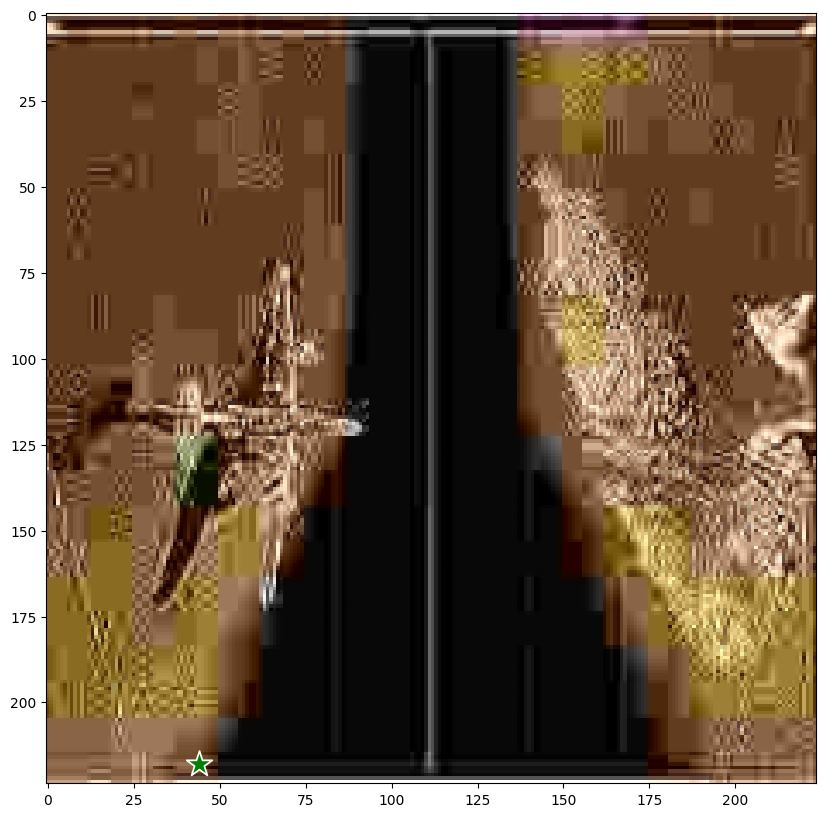

In [ ]:
# Visualize the co-ordinates with maximum SHAP values.

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
# Predict the segments using SAM with prompt (co-ordinates with maximum SHAP value)

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

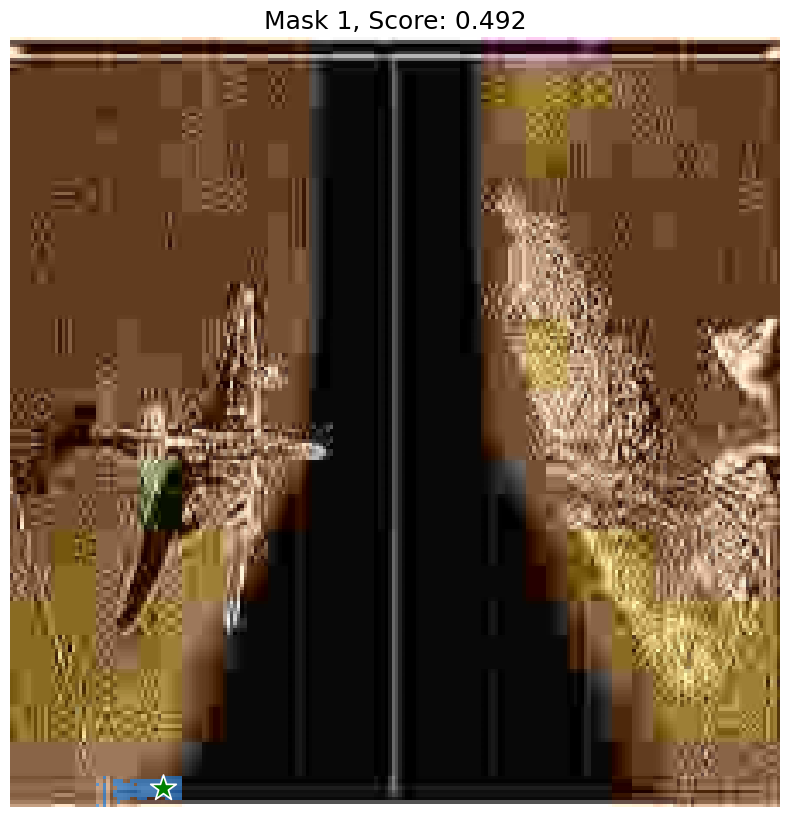

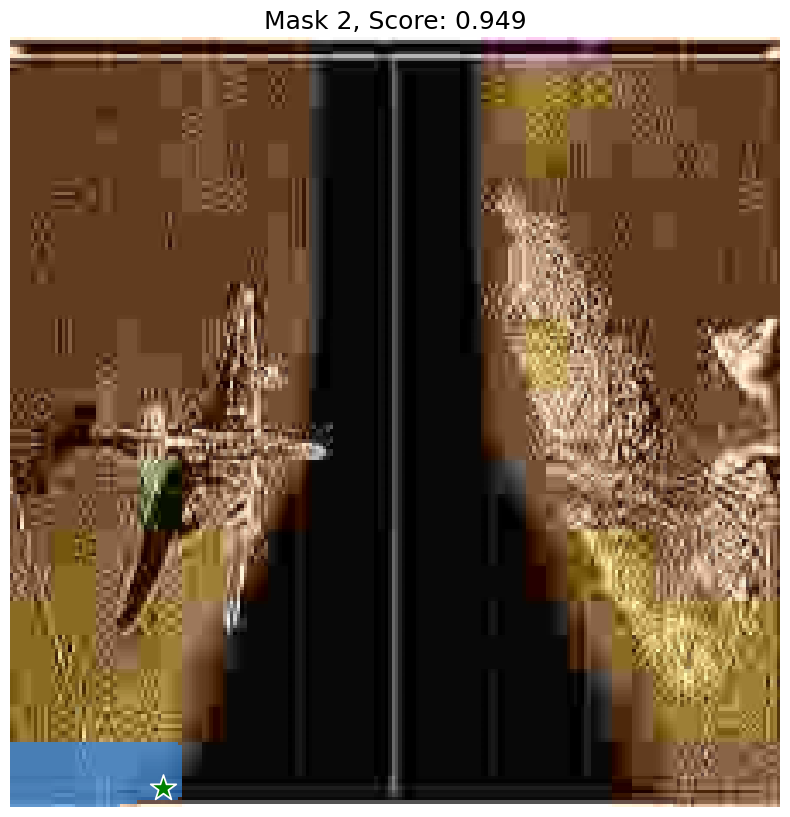

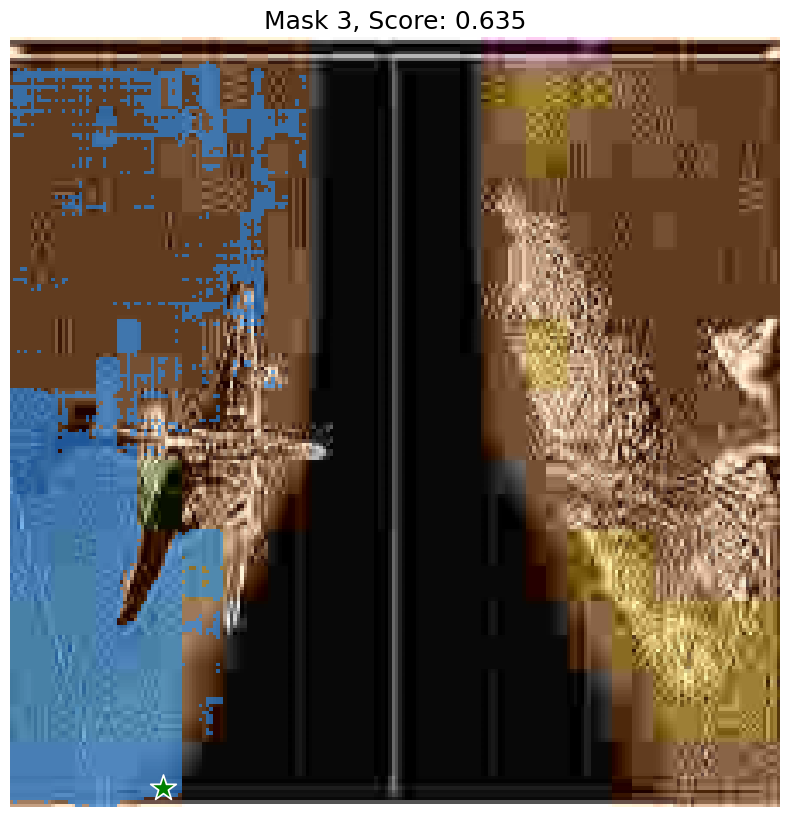

In [ ]:
# Visualize the results

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

In [ ]:
import cv2

# Find index of mask with highest score
index_of_highest_score = np.argmax(scores)


# Save the image in the masked region and explain further.

import cv2

# Find index of mask with highest score
mask_with_highest_score = masks[-1]

# Apply the mask to the original image to extract content inside the mask
image_with_mask = image.copy()  # Assuming 'image' is the original image
image_with_mask[mask_with_highest_score == 0] = [0, 0, 0]  # Set pixels outside mask to black

# Save the image with only content inside the mask overlaid
#content_inside_mask_on_original_image_path = "content_inside_mask_on_original_image.jpg"
# Step 2: Define the path where you want to save the image in your Drive
output_path = "/content/drive/MyDrive/content_inside_mask_on_original_image.jpg"

# Step 3: Save the image to Google Drive (convert RGB to BGR if needed)
cv2.imwrite(output_path, cv2.cvtColor(image_with_mask, cv2.COLOR_RGB2BGR))

#cv2.imwrite(content_inside_mask_on_original_image_path, cv2.cvtColor(image_with_mask, cv2.COLOR_RGB2BGR))
# Step 4: Access the image as a file
image_file = output_path
# Now you have the original image with only content inside the mask overlaid saved as an image
#print("Original image with content inside the mask overlaid saved at:", content_inside_mask_on_original_image_path)
print("Image saved and can be accessed at:", image_file)

Image saved and can be accessed at: /content/drive/MyDrive/content_inside_mask_on_original_image.jpg


####################################@@@@@@@@@@@@@@@@@@@@########## ( Importing llava Successfully Objective)

**Initialize the VLM ; LLaVA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone the repository
!git clone https://github.com/TinyLLaVA/TinyLLaVA_Factory.git /content/tinyllava

# Change directory into the repo
%cd /content/tinyllava

# Checkout the desired branch
!git checkout tinyllava_bench

# Add to Python path
import sys
sys.path.append('/content/tinyllava')


Cloning into '/content/tinyllava'...
remote: Enumerating objects: 1637, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 1637 (delta 182), reused 136 (delta 133), pack-reused 1395 (from 1)
Receiving objects: 100% (1637/1637), 6.19 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (923/923), done.
/content/tinyllava
Branch 'tinyllava_bench' set up to track remote branch 'tinyllava_bench' from 'origin'.
Switched to a new branch 'tinyllava_bench'


New Way of Trying

In [ ]:
from tinyllava.model.builder import load_pretrained_model
from tinyllava.mm_utils import get_model_name_from_path
from tinyllava.eval.run_tiny_llava import eval_model

In [ ]:
from huggingface_hub import login

# Don't provide token; just try loading the model
model_path = "bczhou/TinyLLaVA-3.1B"
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=get_model_name_from_path(model_path))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/88.7k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bczhou/TinyLLaVA-3.1B were not used when initializing TinyLlavaPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.ml

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/796M [00:00<?, ?B/s]

In [ ]:
# model_path = "bczhou/TinyLLaVA-3.1B"
# tokenizer, model, image_processor, context_len = load_pretrained_model(
#     model_path=model_path,
#     model_base=None,
#     model_name=get_model_name_from_path(model_path))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/88.7k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bczhou/TinyLLaVA-3.1B were not used when initializing TinyLlavaPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.ml

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/796M [00:00<?, ?B/s]

################# New trial based on original#################

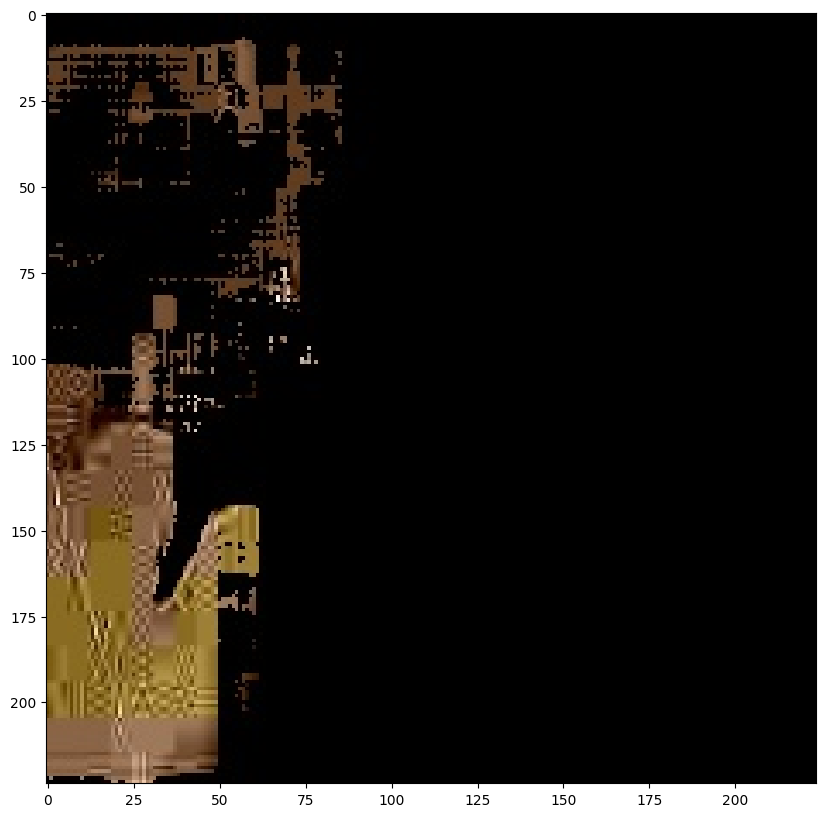

In [ ]:
import cv2
import matplotlib.pyplot as plt

#image_file = "./content_inside_mask_on_original_image.jpg"
# Step 4: Access the image as a file
# Step 2: Define the path where you want to save the image in your Drive
output_path = "/content/drive/MyDrive/content_inside_mask_on_original_image.jpg"

image_file = output_path
custom_image = cv2.imread(image_file)

# Preprocess the image
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image = cv2.resize(custom_image, (224, 224))  # Resize to fit model input size

# Plot reshaped image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [ ]:
# # Install dependencies (transformers, accelerate, etc.)
# !pip install -q transformers==4.36.0 accelerate pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
!pip install -q bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.2 MB/s eta 0:00:00


In [ ]:
# 2) Specify paths & prompt
#model_path = "bczhou/TinyLLaVA-3.1B"
prompt = "Explain the object in the image: 'vase'?"
image_file = output_path   # <-- e.g. "/content/drive/MyDrive/content_inside_mask_on_original_image.jpg"

# 3) Build an Args‐like object, forcing model_name to exactly "bczhou/TinyLLaVA-3.1B"
args = type("Args", (), {
    "model_path": model_path,
    "model_base": None,                 # None is fine when loading a full TinyLLaVA checkpoint
    "model_name": "bczhou/TinyLLaVA-3.1B",
    "query": prompt,
    "conv_mode": "phi",
    "image_file": image_file,
    "sep": ",",
    "temperature": 0,
    "top_p": 1,
    "num_beams": 1,
    "max_new_tokens": 1024
})()
eval_model(args)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bczhou/TinyLLaVA-3.1B were not used when initializing TinyLlavaPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.ml

Printing model forward

In [ ]:
# from tinyllava.model.builder import load_pretrained_model

# tokenizer, model, image_processor, context_len = load_pretrained_model(
#     model_path=model_path,
#     model_base=None,
#     model_name="bczhou/TinyLLaVA-3.1B"
# )

# print(model.forward.__code__.co_varnames)  # Check accepted args


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bczhou/TinyLLaVA-3.1B were not used when initializing TinyLlavaPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.ml

('self', 'input_ids', 'attention_mask', 'position_ids', 'past_key_values', 'inputs_embeds', 'labels', 'use_cache', 'output_attentions', 'output_hidden_states', 'images', 'return_dict')
